In [1]:
import numpy as np
import matplotlib.pyplot as plt
import wradlib as wl
import warnings
warnings.filterwarnings('ignore')
try:
    get_ipython().magic("matplotlib inline")
except:
    plt.ion()

# Vista rápida de un bbarrido en coordenadas polares o coordenadas cartesianas


In [5]:
# Lectura de datos. Conjunto de datos del servicio climatico de Alemania
dt_path = "/home/aceron/Documentos/GitHub/Tesis/datos/OneDrive_3_1-3-2021/"
wl_path = "/home/aceron/Documentos/GitHub/Tesis/wradlib-data-master/"

filename = wl_path+'dx/raa00-dx_10908-0806021735-fbg---bin.gz'
data, meta = wl.io.read_dx(filename)

#Detalles de los datos
print("Forma de los datos polares: ",data.shape)
print("Algunos metadatos del archivo DX:")
print("\t datetime: ",meta["datetime"])
print("\t radarid: ",meta["radarid"])

Forma de los datos polares:  (360, 128)
Algunos metadatos del archivo DX:
	 datetime:  2008-06-02 17:35:00+00:00
	 radarid:  10908


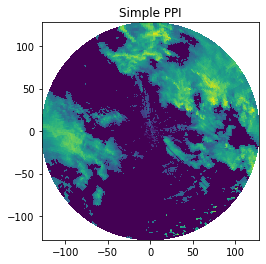

In [10]:
#plot
ax, pm = wl.vis.plot_ppi(data)
txt = plt.title("Simple PPI")

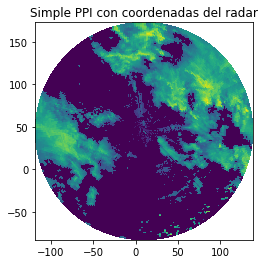

In [12]:
#agregando datos
ax, pm = wl.vis.plot_ppi(data,site=(10,45,0))
txt = plt.title("Simple PPI con coordenadas del radar")

(360, 128)


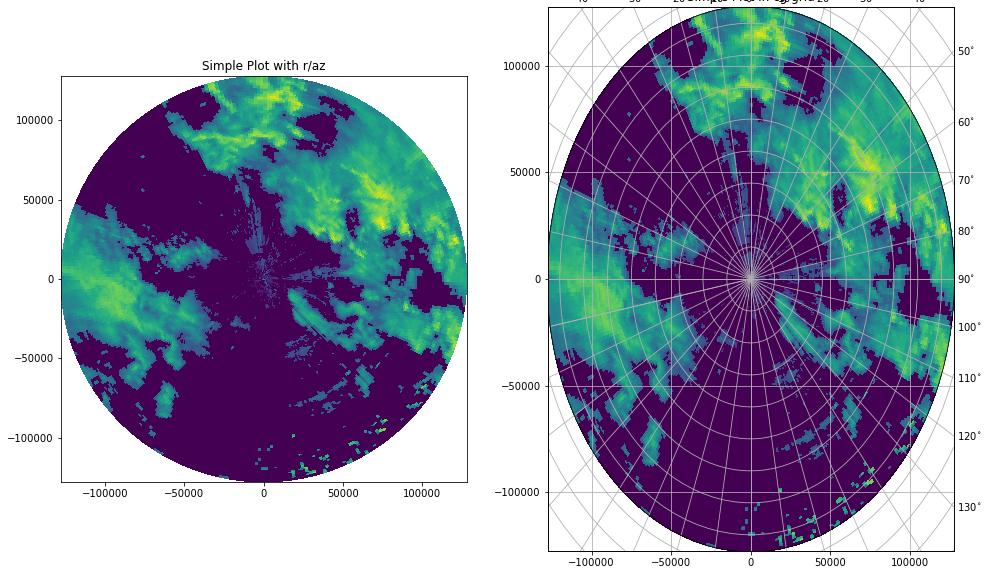

In [20]:
#plot con azimuth, rangos y una malla curvilinea

#Creamos espacios para el rango y el azimuth
print(data.shape)
r = np.arange(data.shape[1],dtype=np.float)
r += (r[1] - r[0])/2
r *= 1000
az = np.arange(data.shape[0], dtype=np.float)
az += (az[1] - az[0])/2

fig = plt.figure(figsize=(16, 10))
ax1, pm = wl.vis.plot_ppi(data, r=r, az=az, ax=121, fig=fig)
ax2, pm = wl.vis.plot_ppi(data, r=r, az=az, proj='cg', ax=122, fig=fig)
t = ax1.set_title('Simple Plot with r/az')
t.set_y(1.05)
t = ax2.set_title('Simple Plot in cg grid')
t.set_y(1.05)

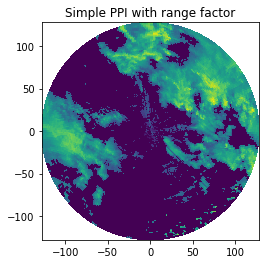

In [24]:
#plot con factor de rango
ax, pm = wl.vis.plot_ppi(data, r=r, az=az, rf=1e3)
txt = plt.title('Simple PPI with range factor')

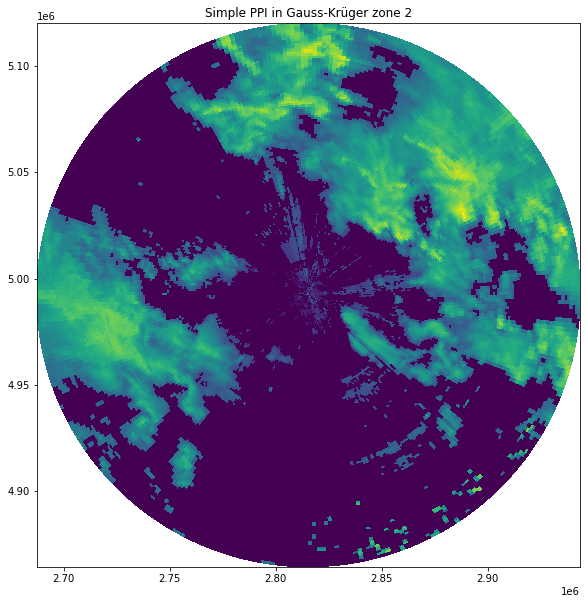

In [27]:
#plot en un sistema de coordendas proyectado
r = np.arange(data.shape[1], dtype=np.float)
r += (r[1] - r[0]) / 2.
r *= 1000
az = np.arange(data.shape[0], dtype=np.float)
az += (az[1] - az[0]) / 2.
epsg=wl.georef.epsg_to_osr(31466)

fig = plt.figure(figsize=(10,10))
ax, pm = wl.vis.plot_ppi(data, r=r, az=az, site=(10, 45, 0), proj=epsg, fig=fig)
txt = plt.title('Simple PPI in Gauss-Krüger zone 2')



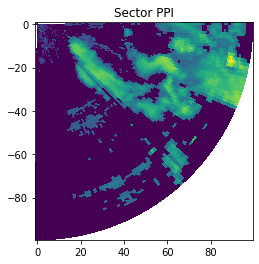

In [33]:
# Graficando solo un sector
r = np.arange(0, 100)
az = np.arange(90, 181)
ax, pm = wl.vis.plot_ppi(data[90:181, :100], r, az)
txt = plt.title('Sector PPI')

In [34]:
#plot usando cartopy
import cartopy.crs as ccrs

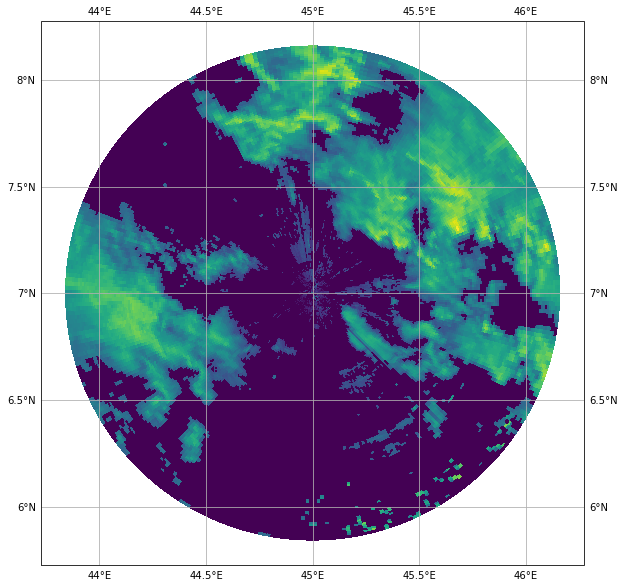

In [39]:
site=(10., 45., 0)
r = np.arange(data.shape[1], dtype=np.float)
r += (r[1] - r[0]) / 2.
r *= 1000
az = np.arange(data.shape[0], dtype=np.float)
az += (az[1] - az[0]) / 2.
site=(45., 7., 0.)
map_proj = ccrs.Mercator(central_longitude=site[1])
fig = plt.figure(figsize=(10,10))
ax, pm = wl.vis.plot_ppi(data, r=r, az=az, site=site, proj=map_proj, fig=fig)
ax.gridlines(draw_labels=True)

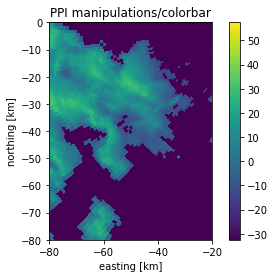

In [41]:
#otros efectos
ax, pm = wl.vis.plot_ppi(data)
ylabel = ax.set_xlabel('easting [km]')
ylabel = ax.set_ylabel('northing [km]')
title = ax.set_title('PPI manipulations/colorbar')
# you can now also zoom - either programmatically or interactively
xlim = ax.set_xlim(-80, -20)
ylim = ax.set_ylim(-80, 0)
# as the function returns the axes- and 'mappable'-objects colorbar needs, adding a colorbar is easy
cb = plt.colorbar(pm, ax=ax)